# Research on apartment sales ads

You will have the data from a real estate agency. It is an archive of sales ads for realty in St. Petersburg, Russia, and the surrounding areas collected over the past few years. You’ll need to learn how to determine the market value of real estate properties. Your task is to define the parameters. This will make it possible to build an automated system that is capable of detecting anomalies and fraudulent activity.

There are two different types of data available for every apartment for sale. The first type is a user’s input. The second type is received automatically based upon the map data. For example, the distance from the city center, airport, the nearest park or body of water. 

### Step 1. Open the data file and study the general information. 

In [74]:
import pandas as pd


#Separate into indexes using sep method 
data = pd.read_csv('/datasets/real_estate_data_us.csv',sep='\t')
print(data.info())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
date_posted          23699 non-null object
days_listed          20518 non-null float64
last_price           23699 non-null float64
bedrooms             23699 non-null int64
kitchen_area         21421 non-null float64
living_area          21796 non-null float64
total_area           23699 non-null float64
balconies            12180 non-null float64
ceiling_height       14504 non-null float64
floors_total         23613 non-null float64
floor                23699 non-null int64
total_images         23699 non-null int64
bike_parking         2775 non-null object
is_studio            23699 non-null bool
is_open_plan         23699 non-null bool
locality_name        23650 non-null object
airport_dist         18157 non-null float64
city_center_dist     18180 non-null float64
park_dist            8079 non-null float64
parks_within_3000    18181 non-null float64
pond_dist            9110 no

### Conclusion

The data file we acquired is a bit hard to read with a human eye as all it was in a single column with \ as a divider. Used sep='\t' to separate column values in their own indexes to work with data in a better way.


### Step 2. Data preprocessing

In [75]:
cols =['days_listed', 'bedrooms']
data[cols].fillna(data[cols].mean())

,days_listed,bedrooms
0,180.888634,3
1,81.000000,1
2,558.000000,2
3,424.000000,3
4,121.000000,2
...,...,...
23694,180.888634,3
23695,45.000000,3
23696,180.888634,2
23697,602.000000,2


In [76]:
#Show missing values
data2=data.isnull().sum().sort_values(na_position='first')
print(data2)
#print(data[data.isnull().any(axis=1)].head())

#replace missing values with average of entire columns

data['locality_name'] = data['locality_name'].fillna('Nameless Locality')
cols=['floors_total','living_area','parks_within_3000','ponds_within_3000','city_center_dist','airport_dist','ceiling_height','balconies','pond_dist','park_dist','kitchen_area','days_listed']
data[cols]=data[cols].fillna(data[cols].mean())
data['bike_parking']=data['bike_parking'].fillna(0)



#convert values into integers
#data['days_employed'] = data['days_employed'].astype(int)
data[['parks_within_3000','park_dist','city_center_dist','airport_dist','bike_parking','total_images','floor','floors_total','ceiling_height','balconies','total_area','living_area','kitchen_area','bedrooms','last_price','days_listed','pond_dist','ponds_within_3000']] = data[['parks_within_3000','park_dist','city_center_dist','airport_dist','bike_parking','total_images','floor','floors_total','ceiling_height','balconies','total_area','living_area','kitchen_area','bedrooms','last_price','days_listed','pond_dist','ponds_within_3000']].astype(int)
data['date_posted'] = pd.to_datetime(data['date_posted'], format = '%Y-%m-%d')






date_posted              0
is_open_plan             0
is_studio                0
total_images             0
total_area               0
floor                    0
bedrooms                 0
last_price               0
locality_name           49
floors_total            86
living_area           1903
kitchen_area          2278
days_listed           3181
parks_within_3000     5518
ponds_within_3000     5518
city_center_dist      5519
airport_dist          5542
ceiling_height        9195
balconies            11519
pond_dist            14589
park_dist            15620
bike_parking         20924
dtype: int64


In [77]:
data2=data.isnull().sum().sort_values(na_position='first')
print(data2)

date_posted          0
parks_within_3000    0
park_dist            0
city_center_dist     0
airport_dist         0
locality_name        0
is_open_plan         0
is_studio            0
bike_parking         0
total_images         0
floor                0
floors_total         0
ceiling_height       0
balconies            0
total_area           0
living_area          0
kitchen_area         0
bedrooms             0
last_price           0
days_listed          0
pond_dist            0
ponds_within_3000    0
dtype: int64


# Conclusion

Columns with numbers are indication we have Nan values there. Nan rows in each column per se. 0 next to a column means there are no Nan values in there. using fillna i replaced nan values.

No Nan values exist as we averaged them all out, except for locality name. For now Any Nan locality will be called Nameless Locality. 

All the rest columns that had missing values were numeric values that we could average down.  Values could be missing because people providing data couldnt tell or didnt record the data because data providers could be people who have never been to the location to tell all the details. Luckily not too many places have missing data. 

I decided that city has parks no matter what and decided to give Nan values average. I decided to replace Nan values with 0 only places where bike parking and balconies had Nan values because it is likely that houses have no bike parking and balconies. With ponds and parks and other data it is more likely there is one nearby so I gave values to average it out.

changed all numeric values to int type to make it easier when calculating as we are not afraid to lose decimals, which also helps to upper or lower averages. Also for date_time I removed time as it doesnt seem to be necessary feature for this project, so I left only Year, Month,and Day.


### Step 3. Make calculations and add them to the table

In [78]:
#price of square meter, divide last price by total area and safve in price_per_square column
data['price_per_square']=data['last_price']/ data['total_area']
#calculated and added to the table: the day of the week, month, and year that the ad was published
data['ad_published']= data['date_posted'].dt.strftime('%d/%m/%Y')
#calculated and added to the table: which floor the apartment is on (first, last, or other)
def blds(row):
    if row['floor'] == 1:
        return 'first'
    if row['floor'] == row['floors_total']:
        return 'last'
    return 'other'
 
data['floor_in_bld'] = data.apply(blds, axis=1)

#calculated and added to the table: the ratio between the living space and the total area, 
#as well as between the kitchen space and the total area
data['living_ratio']=(data['living_area']/data['total_area'])*100
data['kitchen_ratio']=(data['kitchen_area']/data['total_area'])*100
print(data.head())


  date_posted  days_listed  last_price  bedrooms  kitchen_area  living_area  \
0  2019-03-07          180      260000         3            25           51   
1  2018-12-04           81       67000         1            11           18   
2  2015-08-20          558      103920         2             8           34   
3  2015-07-24          424     1298000         3            10           34   
4  2018-06-19          121      200000         2            41           32   

   total_area  balconies  ceiling_height  floors_total  ...  city_center_dist  \
0         108          1               2            16  ...             16028   
1          40          2               2            11  ...             18603   
2          56          0               2             5  ...             13933   
3         159          0               2            14  ...              6800   
4         100          1               3            14  ...              8098   

   park_dist  parks_within_3000  pond_

<div style="border:solid green 4px; padding: 20px">Good <code>apply()</code> call with a correct auxiliary function implementation.</div>

the price per square meter was saved as last_price/total area and saved as price_per_square
the day of the week, month, and year that the ad was published was saved under ad_published.
floor the apartment is on (first, last, or other) was saved in floor_in_bld column
the ratio between the living space and the total area, as well as between the kitchen space and the total area were saved living_ratio and kitchen ratio by divind kitchen and livin area by total area.

printed is the result of first 5 rows of the result.

### Step 4. Conduct exploratory data analysis and follow the instructions below:

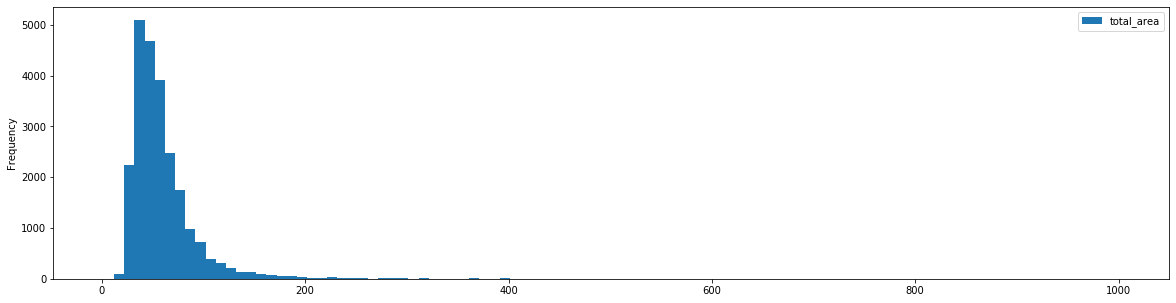

In [97]:
#investigate the following parameters: square area, price, number of rooms, and ceiling height. 
#Plot a histogram for each parameter.
#square area
data.plot(y='total_area', kind='hist',range=(data['price_per_square'].min(),1000),bins=100,figsize=(20,5))



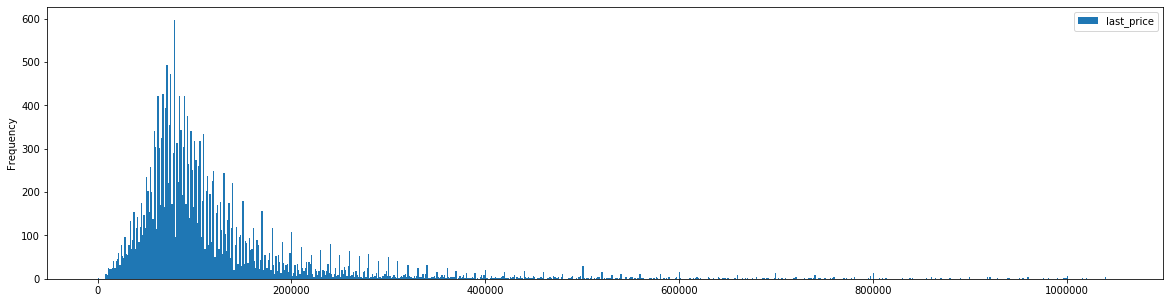

In [96]:
#histogram of prices 
mean_price=data['last_price'].mean() #average price
max_price=data['last_price'].max() #maximum price
starting_price= mean_price/8 # I decided to allow have a minimum price be 8 times cheaper than a minumum
ending_price = mean_price *8 # I decided to allow to have maximum price to be 8 times higher than average
data.plot(y='last_price', kind='hist',range=(data['last_price'].min(),ending_price),bins=800,figsize=(20,5))



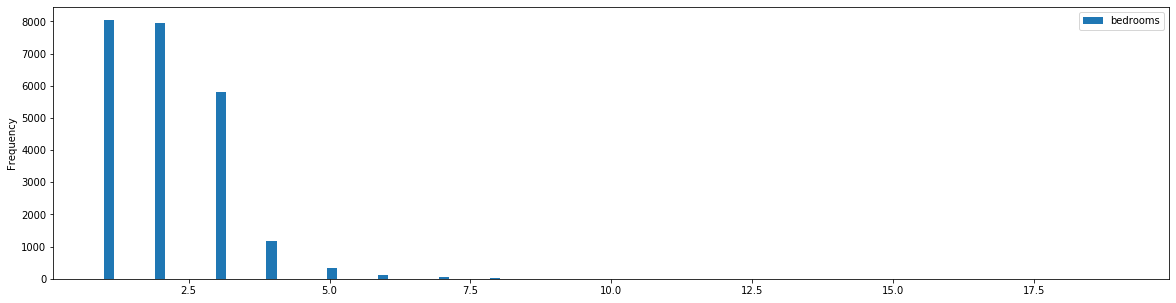

In [93]:
#histogram for number of rooms
data.plot(y='bedrooms', kind='hist',range=(1,data['bedrooms'].max()),bins=100,figsize=(20,5))



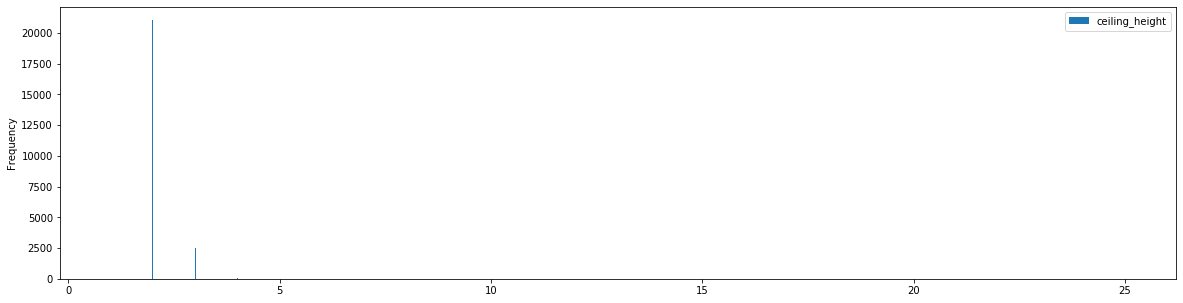

In [94]:
#histogram of ceiling height
data.plot(y='ceiling_height', kind='hist',range=(data['ceiling_height'].min(),25),bins=1000,figsize=(20,5))



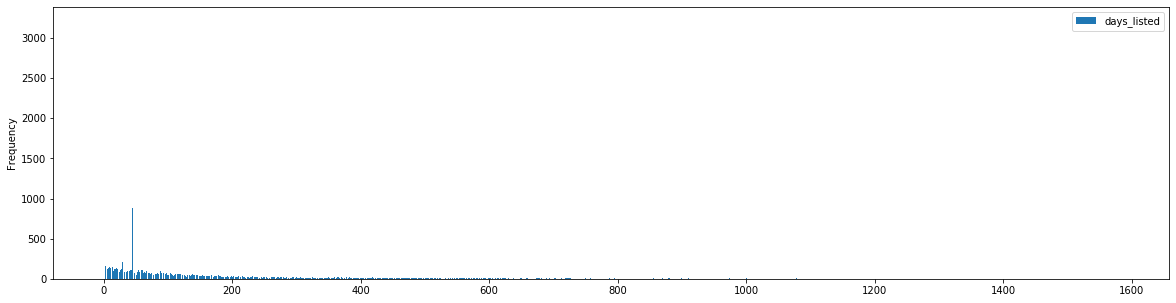

In [95]:
#days_listed
data.plot(y='days_listed', kind='hist',range=(data['days_listed'].min(),data['days_listed'].max()),bins=2000,figsize=(20,5))
average_time_to_sell = data['days_listed'].mean()
median_time_to_sell=data['days_listed'].median()


In [100]:
print('Average Days taken to sell a house: ',average_time_to_sell)
print('Median data of days to sell a house', median_time_to_sell)

#get rid of extremes from total_area, last_price, bedrooms, ceiling height, days_listed
good_data= data.query(('20 <= total_area <= 250') and ('0<=last_price <= 500000') and ('1<=bedrooms<=9 & 1<=ceiling_height<=5') and ('0<=days_listed<=300 & days_listed != 45') )



Average Days taken to sell a house:  180.7693573568505
Median data of days to sell a house 124.0


In [80]:
print('''<condition 1> <logical operator>
...
<condition n>
''')

<condition 1> <logical operator>

<condition n>



First histogram is a histogram of square price tha goes from minimum to 1000 as anything above 1000 is outlier and would be unreallistically expensive. It appears 50 is most common value for price per square meter.

Second histogram  is for last_price. I took the average and divided it by8 to get the 8 times cheaper price and multiplied by 8 to get 8 times as max of average to set the limits. Appears around 70k-80k is most common found prices for apartments. 

Third Histogram is for number of rooms/bedrooms. Appears that 1 bedroom apartments are most predominant , closely followed by 2 bedrooms, 3 bedrooms is not too far away in number  but it sharply decreases for 4 bedroom apartments and  eveb further for more than 5 bedrooms. 9 Bedrooms is the most bedrooms that exists for apartments.

Fourth histogram is  celing height and it seems 2 meters is most common, then 3 meters which is substantially less. and only few places with 4 meters of ceiling height. I put a limit of 20 meters height cause apartments with 20 meters sounds like an outlier.

Fifth Histogram is is how many days apartment was listed for. Seems like apartments get sold pretty quickly as the graph shows it declines steadily as the days progress. There is a weird unusual spike around 45 days though, which we will take care of later. And it seems like 200 days is optimal amount of days to have apartment listed.

Average Days taken to sell a house:  180.7693573568505
Median data of days to sell a house 124.0

Anything sold past 200 days is too slow, anything sold before 50 days is pretty quick.

Removed rare and outlying values from for total_area , left info of (20 <= total_area <= 250) ,last_price of ( 0<=last_price <= 500000), I left 0 because some houses can be so old that nobody wants to buy. Bedrooms I chose amount between 1 and 9, and for ceiling height 1 between 5, and days post listed between   0 and 300. I also removed days_listed that are 45 days as it had weirdly huge spike. Saved all that info in good_data table.



In [7]:
'''
- [ ]  task completed: "Which factors have had the biggest influence on an apartment’s value? 
1)Examine whether the value depends on price per meter, number of rooms, floor (top or bottom), 
or the proximity to the downtown area. 

2)Also study the correlation to the ad posting date: day of the week, month, and year. 
"Select the 10 places with the largest number of ads and then calculate the average price per square meter in these localities. 
Select the locations with the highest and lowest housing prices. 
You can find this data by name in the ’*locality_name’* column. "
'''
corr_data=data.pivot_table(index='last_price', values=['price_per_square','bedrooms','floor','city_center_dist'], aggfunc='mean')
print(corr_data.corr())

locality_square_price=good_data.pivot_table(index=['locality_name'], values=['price_per_square'] , aggfunc=['mean','count'])
print()
print(locality_square_price.sort_values(by = ('count', 'price_per_square'),ascending=False).head(10))
#Select the locations with the highest and lowest housing prices. 
locality_prices=good_data.pivot_table(index=['locality_name'], values=['last_price'] , aggfunc=['mean','count'])
print('Lowest prices for localities:')
print(locality_prices.sort_values(by = ('count', 'last_price'),ascending=True).head(10))
print('Highest prices for localities:')
print(locality_prices.sort_values(by = ('count', 'last_price'),ascending=False).head(10))


                  bedrooms  city_center_dist     floor  price_per_square
bedrooms          1.000000         -0.365822 -0.065631          0.303278
city_center_dist -0.365822          1.000000  0.034378         -0.379054
floor            -0.065631          0.034378  1.000000         -0.017340
price_per_square  0.303278         -0.379054 -0.017340          1.000000

                              mean            count
                  price_per_square price_per_square
locality_name                                      
Saint Petersburg       2210.494051            12317
Murino village         1719.497458              435
Shushary village       1588.231015              353
Vsevolozhsk            1390.840786              302
Pushkin                2046.310970              291
Kolpino                1518.205310              270
Pargolovo village      1819.296981              251
Gatchina               1391.585167              237
Kudrovo village        1860.286095              213
Vyborg    

<div style="border:solid green 4px; padding: 20px">Okay, very good.</div>

First output is the correllation of bedrooms, city_center_distance, floor, and price per square. It seems like highest corellation between these values is bedrooms and price per square, how close to city and number of bedrooms apartment has. Number of rooms definetely has high corellation to price per square. Not sure about negative values. If the negation doesnt matter, then price per square meter and closeness to downtown is the highest factor for price.

second output shows that there are far more apartments in Saint_Petersburg mean price per square meter is 2210 and there are 12317 such apartments. Prices and number of such apartments with high values drop as we look at other places.

third output shows that villages have lowest number of apartments counts with mean values. I tried sorting with lowest value but it sorts by count.

fourth apartment shows that St Petersburg is one the most expenisve and most locations having the expensive apartments. Again wasnt able to sort by value as it sorted by count.


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


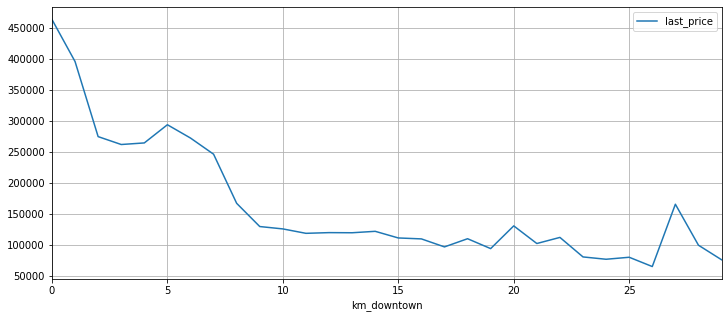

In [104]:
#task completed: "Thoroughly look at apartment offers: each apartment has information about the distance to the downtown area. 
#Select apartments in Saint Petersburg (*‘locality_name’*). Your task is to pinpoint which area is considered to be downtown. 
#Create a column with the distance to the downtown area in km and round to the nearest whole number. 
#Next, calculate the average price for each kilometer. 
#Build a graph to display how prices are affected by the distance to the downtown area. 
#Define the turning point where the graph significantly changes. This will indicate downtown. "


good_data['km_downtown']=(good_data['city_center_dist']/1000).astype(int)

(good_data
 .query('locality_name == "Saint Petersburg"')
 .pivot_table(index='km_downtown', values='last_price', aggfunc='mean')
 .plot(grid=True, figsize=(12, 5))
);




Price of apartments in Saint Petersburg going down in price as they get away further from downtown. Notice after 5 kilometers it just keeps going down quickly. It feels best on 7th and 8th kilometers especially. I think downtown is max of 7 kilometers as after it prices steeply go down.

<div style="border:solid green 4px; padding: 20px">I agree with your conclusions here.</div>

,price_per_square,last_price,bedrooms,ceiling_height
price_per_square,1.000000,0.744995,0.028961,0.125525
last_price,0.744995,1.000000,0.364678,0.069560
bedrooms,0.028961,0.364678,1.000000,0.069797
ceiling_height,0.125525,0.069560,0.069797,1.000000


,bedrooms,floor,km_downtown
bedrooms,1.000000,-0.149670,-0.271956
floor,-0.149670,1.000000,0.221813
km_downtown,-0.271956,0.221813,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbcca2eaa10>,
      dtype=object)

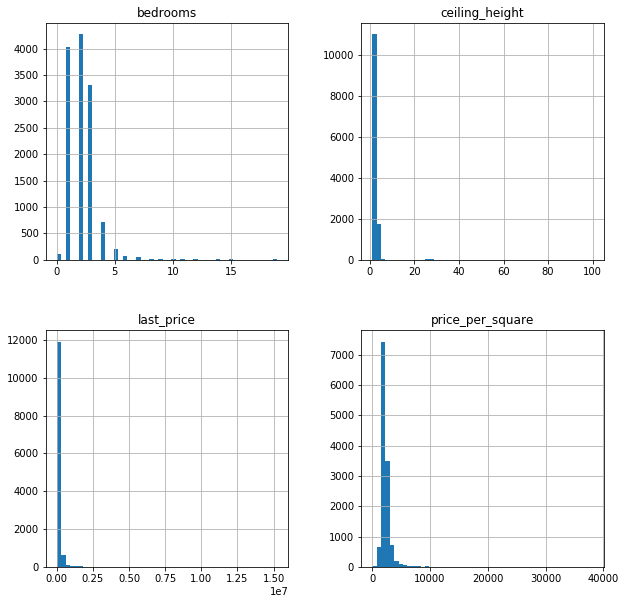

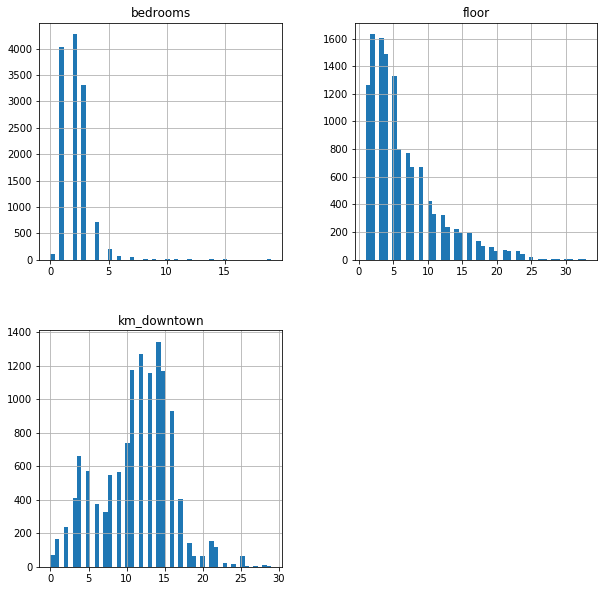

In [107]:
#task completed: "Select a segment of apartments in the downtown. Analyze this area and examine the following parameters: 
#square area, price, number of rooms, ceiling height. 

st_petersburg_downtown= good_data[good_data['km_downtown']<=5] 
st_petersburg_downtown= good_data[good_data['locality_name']=="Saint Petersburg"]
st_pet_corr=st_petersburg_downtown
st_pet_corr1=st_pet_corr[['price_per_square', 'last_price', 'bedrooms', 'ceiling_height']]
display(st_pet_corr1.corr())
st_pet_corr1.hist(bins = 50, figsize=(10,10))

#Also identify the factors that affect an apartment’s price
#(number of rooms, floor, distance to the downtown area, and ad publication date). Draw your conclusions. 
#Are they different from the overall conclusions about the entire city?"

st_pet_corr2=st_pet_corr[['bedrooms', 'floor', 'km_downtown', 'date_posted']]
display(st_pet_corr2.corr())
st_pet_corr2.hist(bins = 50, figsize=(10,10))


<div style="border:solid green 4px; padding: 20px"><code>.corr()</code> returns dataframe, so, a better way of showing that would be via <code>display()</code> function than via <code>print()</code>.</div>

First we see a corellation that last_price and price per square have 56% corellation, Bedrooms and last price is the next closes 55% corelllation in our output.

Floor and distance from downtown is the next highest corellation we see.

Corellation based on histograms show that Saint petersburg is a bit different compared to average data. It has more apartments on 10-15 km away from downtown. With floors most abundant between 1 and 5. Price being on average around 2000+rubles.Rest of the data is similar to overall data.


### Step 5. Overall conclusion

It seems like 1 and 2 bedrooms are most prevalent apartments. Next is prices go down as we go away from center city pretty fast. Average apartments cost 100K and apartments do sell pretty quickly if you consider 6 months being listed ok. Most apartments sell quickly though. Saint Petersburg is an expensive city but it also has highest number of apartments for sale, meaning it must be a big and an urban city looking at the data itself (obviously St. Petersburg is a huge city but let's assume we didnt know and now we know based on data).

Seems like Saint Petersburg is expensive and while apartments are usually found close to 7th kilemeter. Most apartents in Saint Petersburg are on 10-15 km found on sale.

There is a corellation between number of bedrooms, price, and even a ceiling hieight somewhat. Closeness to downtown defientely is a factor too.

<div style="border:solid green 4px; padding: 20px">Okay, you alredy have done a great job, please make those fixes I pointed out, they mostly mean structure changes. Waiting for your respond, thank you for your time!<br><hr><b>upd. </b>Changes done, best of luck at future projects.</div>

### Project completion checklist

Mark the completed tasks with 'x'. Then press Shift+Enter.

- [x]  file opened
- [x]  files explored (first rows printed, info() method)
- [x]  missing values determined
- [x]  missing values filled in
- [x]  clarification of the discovered missing values provided
- [x]  data types converted
- [x]  explanation of which columns had the data types changed and why
- [x]  calculated and added to the table: the price per square meter
- [x]  calculated and added to the table: the day of the week, month, and year that the ad was published
- [x]  calculated and added to the table: which floor the apartment is on (first, last, or other)
- [x]  calculated and added to the table: the ratio between the living space and the total area, as well as between the kitchen space and the total area
- [x]  the following parameters investigated: square area, price, number of rooms, and ceiling height
- [x]  histograms for each parameter created
- [x]  task completed: "Examine the time it's taken to sell the apartment and create a histogram. Calculate the mean and median and explain the average time it usually takes to complete a sale. When can a sale be considered extra quick or taken an extra slow?"
- [x]  task completed: "Remove rare and outlying values and describe the specific details you've discovered."
- [x]  task completed: "Which factors have had the biggest influence on an apartment’s value? Examine whether the value depends on price per meter, number of rooms, floor (top or bottom), or the proximity to the downtown area. Also study the correlation to the ad posting date: day of the week, month, and year. "Select the 10 places with the largest number of ads and then calculate the average price per square meter in these localities. Select the locations with the highest and lowest housing prices. You can find this data by name in the ’*locality_name’* column. "
- [x]  task completed: "Thoroughly look at apartment offers: each apartment has information about the distance to the downtown area. Select apartments in Saint Petersburg (*‘locality_name’*). Your task is to pinpoint which area is considered to be downtown. Create a column with the distance to the downtown area in km and round to the nearest whole number. Next, calculate the average price for each kilometer. Build a graph to display how prices are affected by the distance to the downtown area. Define the turning point where the graph significantly changes. This will indicate downtown. "
- [x]  task completed: "Select a segment of apartments in the downtown. Analyze this area and examine the following parameters: square area, price, number of rooms, ceiling height. Also identify the factors that affect an apartment’s price (number of rooms, floor, distance to the downtown area, and ad publication date). Draw your conclusions. Are they different from the overall conclusions about the entire city?"
- [x]  each stage has a conclusion
- [x]  overall conclusion drawn